In [1]:
# Imports
from PIL import Image
import numpy as np
import cv2
import math
from scipy.fft import dct
import matplotlib.pyplot as plt
import os

## Compressing one 8x8 block

In [2]:
#convert image to grey scale
im = cv2.imread('data/yasuo.jpeg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

In [3]:
#getting an 8x8 block
init_x=50
init_y=100
block = np.array(im[init_x:init_x+8, init_y:init_y+8], dtype=float)-128

In [4]:
block

array([[   5.,  -57.,  -37.,  -55.,  -32.,   82.,   39.,   47.],
       [ -21.,  -49.,  -52.,  -74.,  -33.,   88.,   49.,   79.],
       [ -29.,  -43.,  -58.,  -48., -103.,   34.,   90.,   70.],
       [ -33.,  -36.,  -45.,  -45.,  -77., -105.,   45.,   76.],
       [ -54.,  -44.,  -45.,  -71.,  -49.,  -75., -109.,   68.],
       [ -44.,  -42.,  -40.,  -52.,  -40.,   31.,  -62.,  -89.],
       [ -34.,  -25.,  -42.,  -74.,  -40.,   -8.,   -5.,  -46.],
       [ -29.,  -40.,  -53.,  -55.,  -37.,   -2.,  -22.,  -14.]])

In [5]:
#define c function used in DCT
def c_funct(i):
    if i==0:
        return 1/(2**(1/2))
    else:
        return 1

def dct_matrix():
    result_matrix = np.zeros(shape=(8,8))
    sum = 0
    for i in range(8):
        for j in range(8):
            if i ==0:
                result_matrix[i,j] = np.sqrt(1/8)
            else:
                result_matrix[i,j] = np.sqrt(2/8)*math.cos(((2*j+1)*i*math.pi)/16)
    return result_matrix
    
def dct_funct(block):
    return np.matrix(dct_matrix()) * np.matrix(block) * np.matrix(dct_matrix().transpose())

def idct_funct(block):
    return np.matrix(dct_matrix().transpose()) * np.matrix(block) * np.matrix(dct_matrix())

def round(block_val, q_mat_val):
    return np.round(block_val/q_mat_val)
    if block_val>0:
        return np.floor((block_val+np.floor(q_mat_val/2))/q_mat_val)
    else:
        return np.floor((block_val-np.floor(q_mat_val/2))/q_mat_val)

def quantization(block, q_mat):
    result_mat = np.zeros(shape=(8,8))
    for i in range(8):
        for j in range(8):
            result_mat[i,j] = round(block[i,j], q_mat[i,j])
    
    return result_mat

def inv_quantization(block, q_mat):
    result_mat = np.zeros(shape=(8,8))
    for i in range(8):
        for j in range(8):
            result_mat[i,j] = block[i,j]*q_mat[i,j]
    return result_mat

In [6]:
quant_mat = np.matrix([[16,11,10,16,24,40,51,61],
            [12,12,14,19,26,58,60,55],
            [14,13,16,24,40,57,69,56],
            [14,17,22,29,51,87,80,62],
            [18,22,37,56,68,109,103,77],
            [24,35,55,64,81,104,113,92],
            [49,64,78,87,103,121,120,101],
            [72,92,95,98,112,100,103,99]])

In [7]:
block

array([[   5.,  -57.,  -37.,  -55.,  -32.,   82.,   39.,   47.],
       [ -21.,  -49.,  -52.,  -74.,  -33.,   88.,   49.,   79.],
       [ -29.,  -43.,  -58.,  -48., -103.,   34.,   90.,   70.],
       [ -33.,  -36.,  -45.,  -45.,  -77., -105.,   45.,   76.],
       [ -54.,  -44.,  -45.,  -71.,  -49.,  -75., -109.,   68.],
       [ -44.,  -42.,  -40.,  -52.,  -40.,   31.,  -62.,  -89.],
       [ -34.,  -25.,  -42.,  -74.,  -40.,   -8.,   -5.,  -46.],
       [ -29.,  -40.,  -53.,  -55.,  -37.,   -2.,  -22.,  -14.]])

In [8]:
np.round(np.matrix(dct_matrix())*np.matrix(dct_matrix().transpose()),2)

array([[ 1.,  0., -0.,  0.,  0.,  0., -0., -0.],
       [ 0.,  1.,  0., -0.,  0., -0.,  0.,  0.],
       [-0.,  0.,  1.,  0., -0.,  0.,  0.,  0.],
       [ 0., -0.,  0.,  1.,  0.,  0., -0., -0.],
       [ 0.,  0., -0.,  0.,  1.,  0., -0., -0.],
       [ 0., -0.,  0.,  0.,  0.,  1.,  0., -0.],
       [-0.,  0.,  0., -0., -0.,  0.,  1.,  0.],
       [-0.,  0.,  0., -0., -0., -0.,  0.,  1.]])

In [9]:
np.matrix(np.round(dct_funct(block), 0))

matrix([[-196., -171.,  138.,   28.,  -37.,   -3.,   54.,  -30.],
        [ 111., -122.,   80.,    6.,   -9.,   35.,   25.,  -17.],
        [  65.,  -21.,  -36.,  108.,  -47.,   12.,   33.,   -8.],
        [ -32.,   61.,  -75.,   40.,    6.,  -48.,   52.,   -1.],
        [ -18.,   15.,   29.,  -70.,   74.,  -23.,   -6.,   23.],
        [  11.,   10.,   19.,   -8.,  -26.,   57.,  -51.,   23.],
        [   0.,    9.,  -28.,   31.,  -28.,   36.,   11.,  -31.],
        [  -8.,   -9.,   22.,  -18.,   11.,  -20.,   17.,  -11.]])

In [10]:
#quantization of block
quant_block = quantization(np.round(dct_funct(block)), quant_mat)


In [11]:
quant_block

array([[-12., -16.,  14.,   2.,  -2.,  -0.,   1.,  -0.],
       [  9., -10.,   6.,   0.,  -0.,   1.,   0.,  -0.],
       [  5.,  -2.,  -2.,   4.,  -1.,   0.,   0.,  -0.],
       [ -2.,   4.,  -3.,   1.,   0.,  -1.,   1.,  -0.],
       [ -1.,   1.,   1.,  -1.,   1.,  -0.,  -0.,   0.],
       [  0.,   0.,   0.,  -0.,  -0.,   1.,  -0.,   0.],
       [  0.,   0.,  -0.,   0.,  -0.,   0.,   0.,  -0.],
       [ -0.,  -0.,   0.,  -0.,   0.,  -0.,   0.,  -0.]])

In [12]:
#inverse quantization
inv_quant_block = inv_quantization(quant_block, quant_mat)


In [13]:
inv_dct = idct_funct(inv_quant_block)

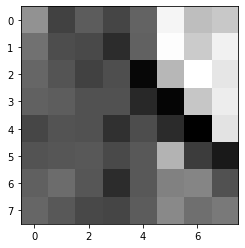

In [14]:
plt.imshow(block,cmap='gray')

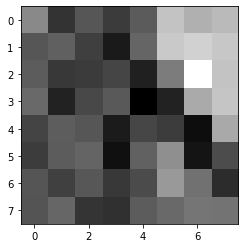

In [15]:
plt.imshow(inv_dct, cmap='gray')

## Compressing the entire image

In [16]:
# compressing the entire image
im = cv2.imread('data/yasuo.jpeg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
image_cropped = np.matrix(im[0:224, 0:224], dtype=float)-128

In [17]:
quant_mat = np.matrix([[16,11,10,16,24,40,51,61],
            [12,12,14,19,26,58,60,55],
            [14,13,16,24,40,57,69,56],
            [14,17,22,29,51,87,80,62],
            [18,22,37,56,68,109,103,77],
            [24,35,55,64,81,104,113,92],
            [49,64,78,87,103,121,120,101],
            [72,92,95,98,112,100,103,99]])

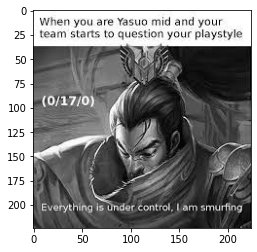

In [18]:
plt.imshow(image_cropped, cmap='gray')

In [19]:
result = np.zeros(shape=(224,224))
for i in range(int(224/8)):
    for j in range(int(224/8)):
        block = image_cropped[i*8:(i+1)*8, j*8:(j+1)*8]
        dct = np.round(dct_funct(block),0)
        quant = np.round(quantization(dct, quant_mat))
        iquant = inv_quantization(quant, quant_mat)
        idct = idct_funct(iquant)
        result[i*8:(i+1)*8, j*8:(j+1)*8] = idct

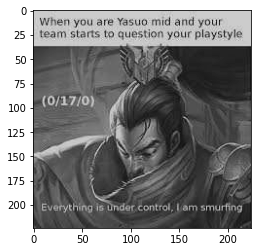

In [20]:
plt.imshow(result, cmap='gray')

## Designing new quantizer

In [21]:
# get image file names
image_file_path = 'data/org/'
files = [f for f in os.listdir(image_file_path)]
files.remove('.DS_Store')
training_set = np.array([])
files = files[:20]

In [22]:
# functions for creating and storing DCT of 8x8 blocks

def import_image(file_path):
    im = cv2.imread(image_file_path + file_path)
    return cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

#cuts images into 8x8 blocks and applies dct, returns array of 8x8 matricies
def blockify(image):
    len_rounded = int(image.shape[0]/8)
    width_rounded = int(image.shape[1]/8)
    return_array = np.zeros(shape=(len_rounded*8, width_rounded*8))

    for i in range(len_rounded):
        for j in range(width_rounded):
            image_block = np.array(image[i*8:(i+1)*8, j*8:(j+1)*8], dtype=float) #decide whether to subtract 128
            return_array[i*8:(i+1)*8, j*8:(j+1)*8] = dct_funct(image_block)
    return return_array

def generate_training(dct_block):
    return_arr = []
    len_rounded = int(dct_block.shape[0]/8)
    width_rounded = int(dct_block.shape[1]/8)
    for i in range(len_rounded):
        for j in range(width_rounded):
            return_arr.append(dct_block[i*8:(i+1)*8, j*8:(j+1)*8])
    return return_arr
    
def quantization(dct_block):
    pass

def reconstruct(quantized_block):
    len_rounded = int(quantized_block.shape[0]/8)
    width_rounded = int(quantized_block.shape[1]/8)
    recon_image = np.zeros(shape=(len_rounded*8, width_rounded*8))
    for i in range(len_rounded):
        for j in range(width_rounded):
            recon_image[8*i:8*(i+1), 8*j:8*(j+1)] = idct_funct(quantized_block[8*i:8*(i+1), 8*j:8*(j+1)])
    return recon_image


In [23]:
bit_al_mat = np.matrix([[6,4,3,1,0,0,0,0],
                        [3,2,2,0,0,0,0,0],
                        [1,1,1,0,0,0,0,0],
                        [0,0,0,0,0,0,0,0],
                        [0,0,0,0,0,0,0,0],
                        [0,0,0,0,0,0,0,0],
                        [0,0,0,0,0,0,0,0],
                        [0,0,0,0,0,0,0,0],
                        ])

## Training quantizer with zero channel error

In [24]:
#for testing, using kmeans clustering algorithm (doesnt account for channel error)
from sklearn.cluster import KMeans
mat_len = bit_al_mat.shape[0]
mat_width = bit_al_mat.shape[1]
quantizer_array = []
for i in range(mat_len):
    for j in range(mat_width):
        if bit_al_mat[i,j]!=0:
            print(bit_al_mat[i,j], 2**bit_al_mat[i,j], (i,j))
            quantizer_array.append([KMeans(n_clusters=2**bit_al_mat[i,j]), (i,j)])

# TODO: create a function that takes in matrix and automatically creates quantizers for each element in matrix

6 64 (0, 0)
4 16 (0, 1)
3 8 (0, 2)
1 2 (0, 3)
3 8 (1, 0)
2 4 (1, 1)
2 4 (1, 2)
1 2 (2, 0)
1 2 (2, 1)
1 2 (2, 2)


In [25]:
training_set = []
count = 0
for image_path in files:
    print(count)
    count =count+1
    blocks = blockify(import_image(image_path))
    training_set = training_set + generate_training(blocks)
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [26]:
# training quantizers
count = 0
for element in quantizer_array:
    print(count)
    count =count + 1
    bit_location = element[1]
    element[0].fit(np.array(training_set)[:,bit_location[0],bit_location[1]].reshape(-1,1))

0
1
2
3
4
5
6
7
8
9


## Testing quantizer with zero channel error

In [27]:
image = cv2.imread(image_file_path+ files[4])
image =  cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image_dct_blocks = blockify(image)

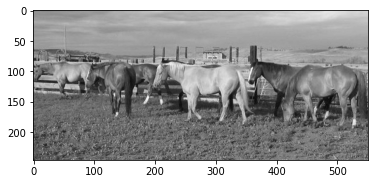

In [28]:
#before compression
plt.imshow(image, cmap='gray')

In [29]:
quantizer_array[0][0].predict([[2]])

array([27], dtype=int32)

In [30]:
return_block_array = []
length = int(image.shape[0]/8)
width = int(image.shape[1]/8)
quantized_output = np.zeros(shape=(length*8, width*8))
for i in range(length):
    for j in range(width):
        block = image_dct_blocks[i*8: (i+1)*8, j*8: (j+1)*8]
        quantized_block = np.zeros(shape=(8,8))
        for element in quantizer_array:
            location = element[1]
            centroid_locations = element[0].cluster_centers_
            pixel_val = block[location]
            centroid_num = element[0].predict([[pixel_val]])[0]
            quantized_block[location] = centroid_locations[centroid_num].copy()
        quantized_output[i*8: (i+1)*8, j*8: (j+1)*8] = quantized_block



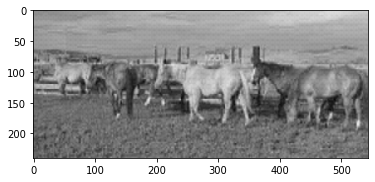

In [31]:
plt.imshow(reconstruct(quantized_output), cmap='gray')

## Channel optimized quantizer

Implementing quantizer that is channel optimized for a memoryless channel

In [32]:
#importing channel optimized channel
cluster = KMeans(2)
cluster.fit(np.array([1,2,3,4,5,6,7,8,9,10]).reshape(-1, 1))
cluster.cluster_centers_

array([[3.],
       [8.]])

In [33]:
from sklearn.cluster import KMeans
import numpy as np
from cosq_class import CoSQ
from image_quantizer import ImageQuantizer

In [34]:
cluster = KMeans(4)
arr = [np.random.rand()*1000 for i in range(1000)]
cluster.fit(np.array(arr).reshape(-1,1))
cluster_c = CoSQ(0, 2)
cluster_c.training_set(arr)
cluster_c.c_fit()
print('2 different quantized values:',cluster_c.quantize(43), cluster.cluster_centers_[cluster.predict([[12]])][0][0])
print(cluster.cluster_centers_)
print(cluster_c.centroids)

4 1000
[393.41977 880.235   128.42336 636.035  ]
2 different quantized values: 128.42336 116.26946588302661
[[116.26946588]
 [865.7941129 ]
 [356.27494639]
 [600.19745115]]
[393.41977 880.235   128.42336 636.035  ]


44012
0
64 44012
[ 211.74535  1776.5623   1940.5625   1025.5669    124.201385  825.9887
  180.29639  1602.8665    932.29     1383.4061   1537.9155    639.2305
 1241.0262    337.99045   245.69846   710.1437     33.360294  865.4178
  749.2947    526.28973  2017.8594   1203.7616    617.35913  1869.611
 2039.5803    907.6454    396.33023   479.80768  1351.9515    424.65497
  768.69073  1283.631     885.34644  1731.8344    730.4408    547.31903
  687.16943   308.05884  1826.6497   1489.2621   1110.7225    662.88885
  807.10345  1157.6647    990.4193    368.97806   959.14496  1671.5515
  278.1872    570.14734   593.1885   1414.695     152.8062    788.5089
  845.66986    73.119896 1973.2046    504.4577    453.36752  1451.3134
 1320.2789   1913.0698     97.36859  1065.3398  ]
1
16 44012
[ 7.05381714e+02  3.46397583e+02  4.11034729e+02  1.02474396e+02
  2.85858582e+02  1.61976257e+02  5.71789978e+02 -8.95367563e-02
 -6.07849731e+01  2.21246292e+02  6.55805359e+02  4.60048256e+01
  6.65726013e+0

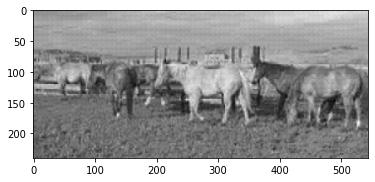

In [41]:
img_quant = ImageQuantizer(bit_al_mat=bit_al_mat, epsilon=0)
img_quant.import_training_set('data/org/')
img_quant.train()
image = cv2.imread(image_file_path+ files[4])
plt.imshow(img_quant.compress_image(image), cmap='gray')

44012
0
64 44012
[ 665.23157  474.8441   802.0539  1610.311    659.2811   745.3205
 1893.7828  1531.6614  1033.2358  1264.4662   516.8181  1225.4039
 1125.8175   991.26666 1068.399    664.17664  712.42737 1427.6578
 1261.8019  1679.3591   670.1345   166.41925 1588.5929  1229.2649
  589.1671   959.314    771.25244  904.3996   470.97098  318.02032
  777.4621   917.93506 1442.0784  1420.5453   817.08264 1337.6783
 1549.3785  1487.5804  1293.613   1159.8279  1225.4495  1132.4036
 1395.6678  1032.8308  1058.7944   979.6518   953.53625  397.34747
  868.9775  1781.5531  1017.42694 1418.0493  1032.0634   839.29785
 1482.5634   980.33075 1245.2445  1040.3542   902.2455  1447.823
  645.45667  853.732   1258.2458  1048.3354 ]
1
16 44012
[ 506.17426    578.15466    695.32544    197.16176    307.90424
  541.1506    -162.02515      0.9669871  440.97522    349.58023
  270.45132    629.1703     390.91876     97.03836    563.28485
  452.39133  ]
2
8 44012
[ -1.6229959  73.02633    38.4296    -89.04798 

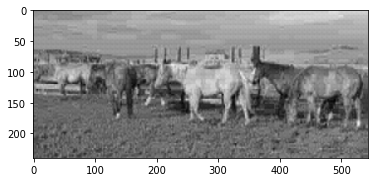

In [42]:
img_quant = ImageQuantizer(bit_al_mat=bit_al_mat, epsilon=0.005)
img_quant.import_training_set('data/org/')
img_quant.train()
image = cv2.imread(image_file_path+ files[4])
plt.imshow(img_quant.compress_image(image), cmap='gray')

44012
0
64 44012
[1248.0975  1149.4684  1145.6282  1053.4584  1557.1047  1245.2173
 1245.8707  1155.0903  1170.7706  1126.3358  1112.6558  1077.2078
 1253.4099  1180.2733  1168.8506  1139.6073  1102.6799  1006.735
 1004.1688   671.9198  1206.3417  1112.4739  1119.6063  1025.0067
 1070.9482  1018.4153   985.2835   884.77637 1131.1816  1095.8179
 1084.8793  1051.7126  1279.8148  1194.8969  1175.7195  1131.305
 1376.4059  1246.3713  1231.7782  1184.0405  1191.3663  1162.1404
 1141.9432  1125.0223  1234.6796  1207.4438  1182.3119  1158.791
 1151.4193  1100.9528  1089.2998  1010.8068  1203.8322  1152.1365
 1154.6062  1110.7457  1105.3604  1078.1492  1054.7157  1025.5426
 1146.2394  1131.2697  1115.272   1094.6176 ]
1
16 44012
[293.91525  370.6582   326.08414  414.25662   39.946274 243.77832
 176.02081  292.51324  358.3081   430.47583  473.72818  575.1694
 308.81317  384.7144   363.4527   425.461   ]
2
8 44012
[ 74.641655 158.22884    8.674075 112.67134  171.34285  284.8945
 136.4967   200.7

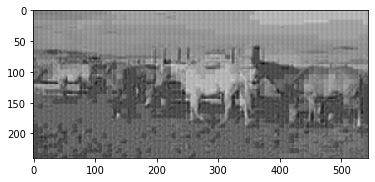

In [43]:
img_quant = ImageQuantizer(bit_al_mat=bit_al_mat, epsilon=0.05)
img_quant.import_training_set('data/org/')
img_quant.train()
image = cv2.imread(image_file_path+ files[4])
plt.imshow(img_quant.compress_image(image), cmap='gray')